In [3]:
import pandas as pd

df = pd.read_csv('fct_invoice.csv')
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
jsondf = pd.read_json("dim_customer.json")
jsondf

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


EASY #1: How many unique customers are in the dataset?

In [5]:
len(df['customer_id'].unique())

5191

EASY #2: What are the different categories of products available? How many unique categories are there?

In [6]:
print(df['category'].unique()) #the different categories of products

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


In [7]:
len(df['category'].unique()) #the number of unique categories

8

EASY #3: Which payment method is the most popular? How many times was it used?

In [8]:
df['payment_method'].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

MEDIUM #1: What are the three most popular categories, by total sales?

In [9]:
df['revenue'] = df['price']*df['quantity']
df.groupby('category')['revenue'].sum().sort_values(ascending=False).head(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: revenue, dtype: float64

MEDIUM #2: What are the total sales attributed to customers over the age of 45?

In [19]:
df_extra = pd.merge(df,jsondf,left_on = "customer_id",right_on = "id")
df_extra

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,revenue,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,162.64,NaN,William,M,229,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,5401.53,NaN,William,M,229,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,2700.72,NaN,William,M,229,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,15004.25,NaN,William,M,229,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,600.17,NaN,Melissa,F,4973,Bell
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,378.75,36.0,Leslie,F,6161,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,7502.00,NaN,Kelly,F,6779,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,1200.32,47.0,Shawn,M,8386,Perez


In [11]:
df_extra.loc[df_extra['age'] >= 45, 'revenue'].sum()

84307291.82000001

MEDIUM #3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In [12]:
invoice_datecounts = pd.to_datetime(df['invoice_date']).value_counts()
df_invoicecounts = invoice_datecounts.reset_index()
df_invoicecounts.columns = ['invoice_date', 'count']
print(df_invoicecounts)

/var/folders/8d/09wf4d9x6lzfbp2ycv4g119m0000gn/T/ipykernel_55101/3130706256.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  invoice_datecounts = pd.to_datetime(df['invoice_date']).value_counts()


    invoice_date  count
0     2021-11-24    159
1     2023-02-26    156
2     2021-06-01    155
3     2022-07-25    155
4     2022-10-23    155
..           ...    ...
792   2021-10-27     98
793   2021-05-29     98
794   2021-09-30     96
795   2021-02-12     94
796   2022-01-16     93

[797 rows x 2 columns]


In [14]:
df_invoicecounts['month_year'] = df_invoicecounts['invoice_date'].dt.to_period('M')
df_grouped_sum = df_invoicecounts.groupby('month_year')['count'].sum().reset_index()
df_grouped_sum.columns = ['month_year', 'count']
df_grouped_sum = df_grouped_sum.sort_values('month_year')
print(df_grouped_sum)

   month_year  count
0     2021-01   3771
1     2021-02   3402
2     2021-03   3918
3     2021-04   3770
4     2021-05   3864
5     2021-06   3761
6     2021-07   4014
7     2021-08   3750
8     2021-09   3619
9     2021-10   3873
10    2021-11   3744
11    2021-12   3896
12    2022-01   3842
13    2022-02   3445
14    2022-03   3927
15    2022-04   3738
16    2022-05   3852
17    2022-06   3788
18    2022-07   3870
19    2022-08   3881
20    2022-09   3752
21    2022-10   3917
22    2022-11   3722
23    2022-12   3817
24    2023-01   2745
25    2023-02   2488
26    2023-03    372
27    2023-04    395
28    2023-05    396
29    2023-06    389
30    2023-07    383
31    2023-08    370
32    2023-09    263
33    2023-10    240
34    2023-11    233
35    2023-12    250


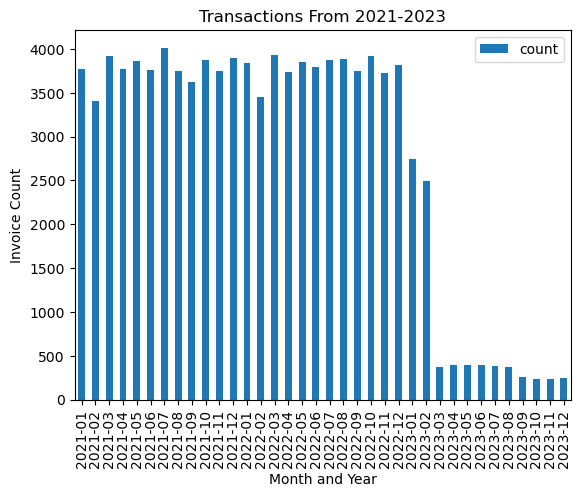

In [18]:
df_grouped_sum.plot(x = 'month_year', y = 'count', kind = 'bar')
plt.xlabel('Month and Year')
plt.ylabel('Invoice Count')
plt.title('Transactions From 2021-2023')
plt.show()

HARD #1: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [21]:
df_extra['age'].describe()

count    59352.000000
mean        49.407501
std         18.573082
min         18.000000
25%         34.000000
50%         48.000000
75%         64.000000
max         85.000000
Name: age, dtype: float64

In [24]:
df_extra['age_range'] = ""
df_extra

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,revenue,age,first_name,gender,id,last_name,age_range
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson,
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,162.64,NaN,William,M,229,Anderson,
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,5401.53,NaN,William,M,229,Anderson,
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,2700.72,NaN,William,M,229,Anderson,
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,15004.25,NaN,William,M,229,Anderson,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,600.17,NaN,Melissa,F,4973,Bell,
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,378.75,36.0,Leslie,F,6161,Bass,
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,7502.00,NaN,Kelly,F,6779,Roberts,
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,1200.32,47.0,Shawn,M,8386,Perez,


In [46]:
condition1 = df_extra['age'] >= 80
condition2 = df_extra['age'] < 90
condition3 = df_extra['age'] >= 70
condition4 = df_extra['age'] < 80
condition5 = df_extra['age'] >= 60
condition6 = df_extra['age'] < 70
condition7 = df_extra['age'] >= 50
condition8 = df_extra['age'] < 60
condition9 = df_extra['age'] >= 40
condition10 = df_extra['age'] < 50
condition11 = df_extra['age'] >= 30
condition12 = df_extra['age'] < 40
condition13 = df_extra['age'] >= 20
condition14 = df_extra['age'] < 30
condition15 = df_extra['age'] >= 10
condition16 = df_extra['age'] < 20
condition17 = df_extra['age'] < 0

df_extra.loc[condition1 & condition2, 'age_range'] = "80-89"
df_extra.loc[condition3 & condition4, 'age_range'] = "70-79"
df_extra.loc[condition5 & condition6, 'age_range'] = "60-69"
df_extra.loc[condition7 & condition8, 'age_range'] = "50-59"
df_extra.loc[condition9 & condition10, 'age_range'] = "40-49"
df_extra.loc[condition11 & condition12, 'age_range'] = "30-39"
df_extra.loc[condition13 & condition14, 'age_range'] = "20-29"
df_extra.loc[condition15 & condition16, 'age_range'] = "10-19"
df_extra.loc[df_extra['age_range'] == '', 'age_range'] = "No Age"
df_extra

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,revenue,age,first_name,gender,id,last_name,age_range
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson,No Age
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,162.64,NaN,William,M,229,Anderson,No Age
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,5401.53,NaN,William,M,229,Anderson,No Age
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,2700.72,NaN,William,M,229,Anderson,No Age
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,15004.25,NaN,William,M,229,Anderson,No Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,600.17,NaN,Melissa,F,4973,Bell,No Age
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,378.75,36.0,Leslie,F,6161,Bass,30-39
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,7502.00,NaN,Kelly,F,6779,Roberts,No Age
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,1200.32,47.0,Shawn,M,8386,Perez,40-49


In [47]:
pivot_table = pd.pivot_table(df_extra, values='revenue', index='category', columns='age_range', aggfunc='sum')
pivot_table

age_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,No Age
category,,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,334012.05
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,46003764.40
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,2777362.62
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,345875.59
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,26468097.17
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,265661.04
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,23865450.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,1587210.24
